In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [191]:
_r_0 = {
    "x": [x for x in range(15, 15 + 8)],
    "A": [0, 124, 1036, 1600, 1910, 1870, 970, 320]
}
zeros_x = [15, 20.9, 26.8, 32.55, 38.35]

_r_inf = {
    "x": [16.6 + i for i in range(1, 8)],
    "A": [950, 1070, 1080, 970, 810, 810, 940]
}

_rupr = {
    "a": [x*10 for x in range(12)],
    "A": [342, 328, 264, 228, 192, 144, 92, 60, 41, 31, 15.6, 0.9]
}

_polarization = {
    "a": [x*10 for x in range(19)],
    "A": [125, 168, 264, 320, 482, 654, 748, 808, 836, 836, 836, 812, 736, 676, 488, 384, 276, 172, 172]
}

_pvo = {
    "l": [x for x in range(14)],
    "A": [608, 472, 364, 296, 256, 220, 168, 108, 88, 56, 36, 24, 12, 0]
}

_w_lenght = {
    "l": [5.15, 5.65, 6.3, 6.95, 7.45, 7.95, 8.5],
    "A": [0 for x in range(7)]
}

print(_rupr)

r_0 = pd.DataFrame(data=_r_0)
r_inf = pd.DataFrame(data=_r_inf)
rupr = pd.DataFrame(data=_rupr)
polarization = pd.DataFrame(data=_polarization)
pvo = pd.DataFrame(data=_pvo)
w_lenght = pd.DataFrame(data=_w_lenght)


{'a': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'A': [342, 328, 264, 228, 192, 144, 92, 60, 41, 31, 15.6, 0.9]}


In [192]:
r_0

,x,A
0,15,0
1,16,124
2,17,1036
3,18,1600
4,19,1910
5,20,1870
6,21,970
7,22,320


In [193]:
r_0
r_inf

,x,A
0,17.6,950
1,18.6,1070
2,19.6,1080
3,20.6,970
4,21.6,810
5,22.6,810
6,23.6,940


In [194]:
rupr

,a,A
0,0,342.0
1,10,328.0
2,20,264.0
3,30,228.0
4,40,192.0
5,50,144.0
6,60,92.0
7,70,60.0
8,80,41.0
9,90,31.0


In [195]:
polarization

,a,A
0,0,125
1,10,168
2,20,264
3,30,320
4,40,482
5,50,654
6,60,748
7,70,808
8,80,836
9,90,836


In [196]:
pvo

,l,A
0,0,608
1,1,472
2,2,364
3,3,296
4,4,256
5,5,220
6,6,168
7,7,108
8,8,88
9,9,56


In [197]:
w_lenght

,l,A
0,5.15,0
1,5.65,0
2,6.30,0
3,6.95,0
4,7.45,0
5,7.95,0
6,8.50,0


Длина волны = 5.775 мм


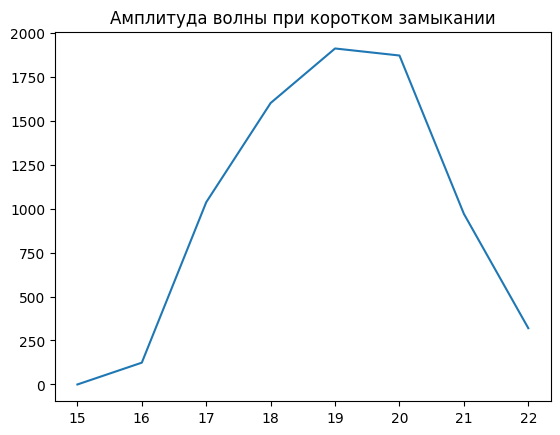

In [198]:
#Нули: 26,8 ; 32,55; 38,35
wave_length = np.mean([((32*20+11)/20) - (((26*20+16)/20)), ((38*20+7)/20) - ((32*20+11)/20)])

print(f"Длина волны = {wave_length} мм")

plt.plot(r_0["x"], r_0["A"])
plt.title("Амплитуда волны при коротком замыкании")
plt.show()

Длина волны = 6 мм


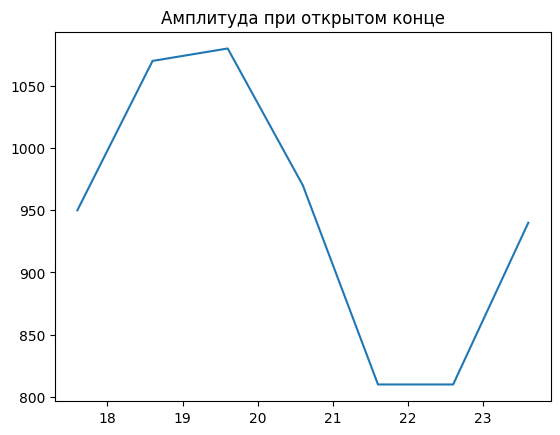

In [199]:
# Видно из графика что произошло одно полное колебание (нач сдвиг = 1мм, кон сдвиг = 7мм), логично, что..
print(f"Длина волны = {7-1} мм")

plt.plot(r_inf["x"], r_inf["A"])
plt.title("Амплитуда при открытом конце")
plt.plot()
plt.show()

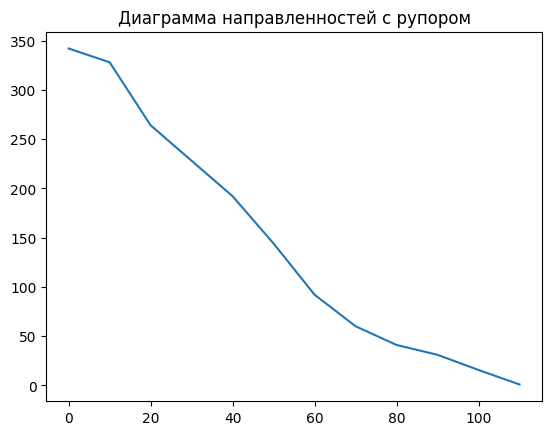

In [200]:
plt.title("Диаграмма направленностей с рупором")
plt.plot(rupr["a"], rupr["A"])
plt.show()

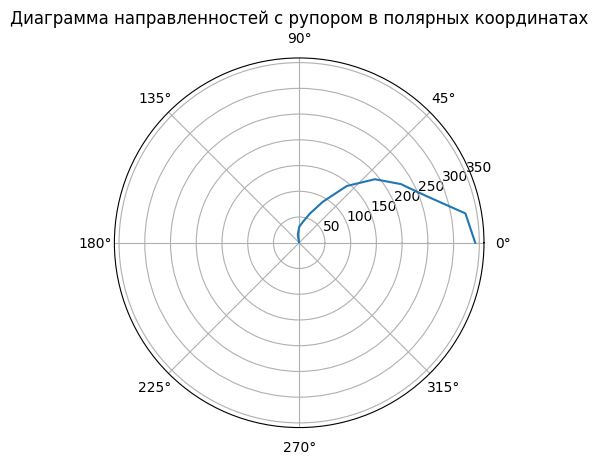

In [201]:
plt.polar()
plt.title("Диаграмма направленностей с рупором в полярных координатах")
plt.plot(rupr["a"]/180*np.pi, rupr["A"])

$$ \Delta\varphi_{theor}=\frac{\lambda}{D},\ \ \ \ \Delta\varphi_{prac} = |\frac{\varphi_2 - \varphi_1}{2}|: \varphi_1 \ne \varphi_2,\ A(\varphi_1) = A(\varphi_2) = \frac{A_{max}}{\sqrt{2}}$$

### $$A_{max} = 0.836 В,\ \ \ \varphi_1 = 70^{\circ}, \varphi_2 = 120^{\circ} \Longrightarrow \Delta\varphi_{prac} = 25^{\circ}$$
### $$\lambda = 0.0085м, D = 0.02м, \Longrightarrow \Delta\varphi_{theor} \approx 24.35^{\circ}$$

In [202]:
print(f"△φ = {(0.0085/0.02)*(180/np.pi)}")

△φ = 24.35070629305999


## Оценка минимального расстояния, на которых можно снимать диаграммы направленности
## $$r > \frac{2D^2}{\lambda} \approx 0.094м$$

In [203]:
# print("(2*(0.02)**2)/0.0085")

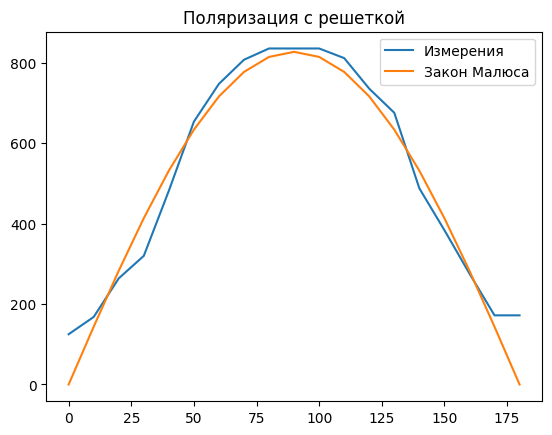

In [204]:
E_0 = 0.836
I_0 = E_0**2/(2*4*np.pi*10*3)
def I_maluc(a):
    k = 0.98
    return k*I_0*np.sin(a)**2

plt.title("Поляризация с решеткой")
plt.plot(polarization["a"], polarization["A"], label="Измерения")
plt.plot(polarization["a"], [np.sqrt(I_maluc(a/180*np.pi)*2*4*np.pi*10*3)*1000 for a in polarization["a"]], label="Закон Малюса")
plt.legend()
plt.show()

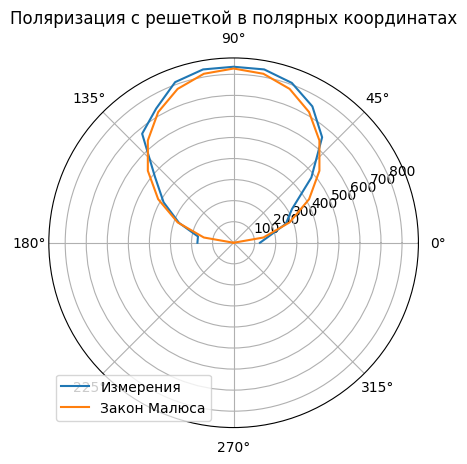

In [205]:
plt.polar()
plt.title("Поляризация с решеткой в полярных координатах")
plt.plot(polarization["a"]/180*np.pi, polarization["A"], label="Измерения")
plt.plot(polarization["a"]/180*np.pi, [np.sqrt(I_maluc(a/180*np.pi)*2*4*np.pi*10*3)*1000 for a in polarization["a"]], label="Закон Малюса")
plt.legend()
plt.show()

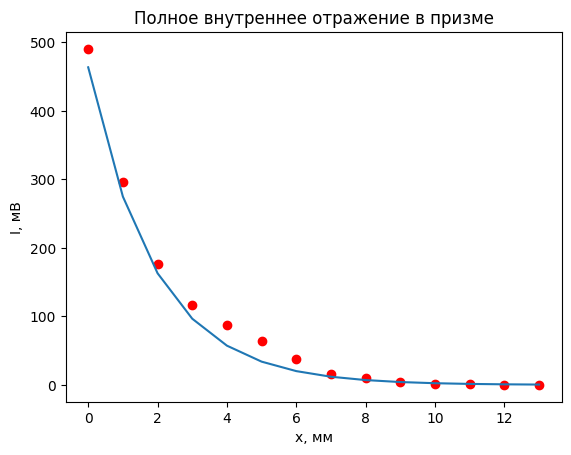

In [206]:
teta = 45*np.pi/180
n_stekl = 3/2
lamd = 8.5
a = 2*np.pi/lamd*np.sqrt(n_stekl**2*np.sin(teta)**2-1)

def intense(x):
    return I_0*np.exp(-2*a*x)

plt.title("Полное внутреннее отражение в призме")
plt.scatter(pvo["l"], pvo["A"]**2/(2*4*np.pi*10*3), color="red", label="Измерения")
plt.plot(pvo["l"], intense(pvo["l"])*500000, label="Теория")
plt.xlabel("x, мм")
plt.ylabel("I, мВ")
plt.show()